# ADS Homework 3

## 1: Classification of Hand-Written Digits

Sklearn provides a dataset of handwritten digits as one of the examples. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

/Users/aliakasem/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


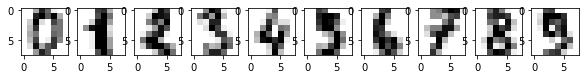

In [4]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Task 1: Apply PCA to see if we can describe the data with a smaller number of most significant features

In [5]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
## code here
scaler = preprocessing.StandardScaler().fit(data)
dataS=scaler.transform(data)  
#perform PC decomposition 
pca = PCA(dataS.shape[1])
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_

In [6]:
#perform PC decomposition 
pca = PCA(dataS.shape[1])
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_

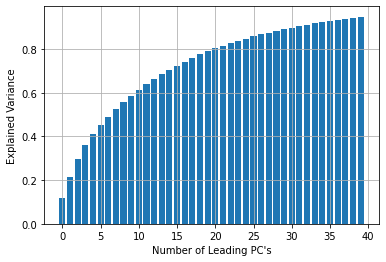

In [7]:
#plot explained variance per number of Leading PC's
n=40
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of Leading PC's")
plt.ylabel("Explained Variance")
plt.grid()

#describe in a few words what you can infer from the above plot
#We see that these 40 components account for just over 90% of the variance. 
#### Figure 1. PCA of most significant features
we see that with the digits the first 10 components contain is about 35% to 40% We see that the variance goes over the 97% with a 40 components accout.

### Task 2: Now use three leading PCs to visualize the digits (different colors for different digits)

In [9]:
pca = PCA(3)  # project from 64 to 3 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 3)


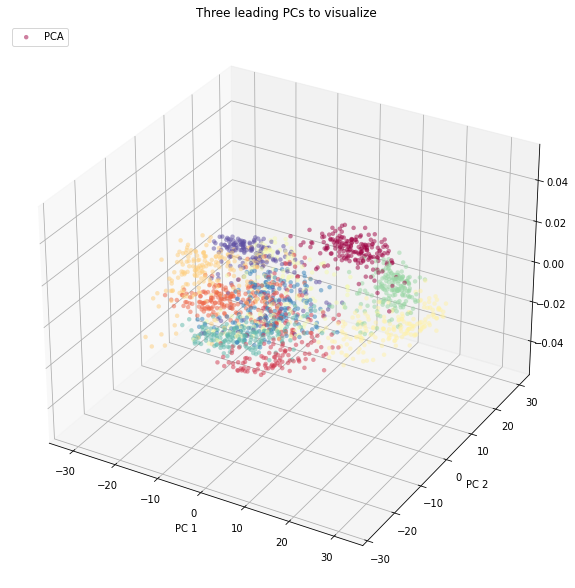

In [10]:
ax = plt.figure(figsize=(10,15)).gca(projection='3d')
ax.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 12))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Three leading PCs to visualize')
plt.legend(['PCA'],loc='upper left')

## code here

### Task 3: Find six examples of the pairs of digits which a) can and b) can not be clearly distinguished on a 2D plot of  first two PCs (3 examples each)

In [11]:
pca2D = PCA(3) #take only 3 leading principal components to get enough data but avoid overfitting
two_PCs = pca.fit_transform(digits.data)

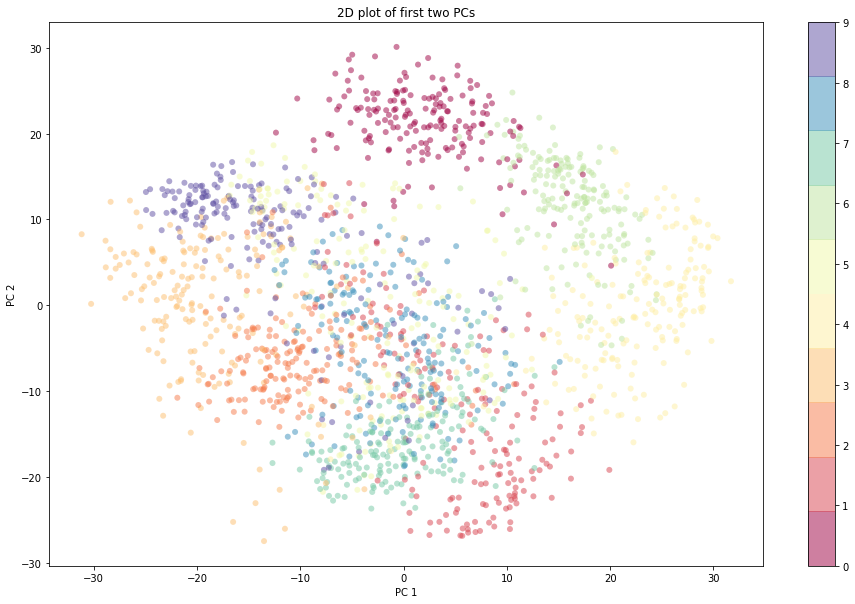

In [12]:
## code here

#Plotting the projected principal components and try to understand the data.
plt.figure(figsize=(16,10))
plt.scatter(two_PCs[:, 0], two_PCs[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
 
    
    

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('2D plot of first two PCs')
#plt.legend()
plt.colorbar();


### Figure 3. 2D scatter plot with the 3 leading principal components

# 2. PCA for feature engineering   

#Another common application of PCA is overcomming multicollinearity and overfitting in regression models. Here we'll use PCA for reducing dimensionality of a data set and improving the accuracy in the regression task.

In [169]:
#read data
data=pd.read_csv("https://raw.githubusercontent.com/CUSP2021ADS/Data/main/pca_synthetic.csv")
df1= data
df1.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


### Task 1: Run a linear regression with 'Y' as the target and x1-x15 as regressors and report out of sample R2 score

Split the data into training and test (choose 70:30 split) and report out of sample score with test data. Also comment on the significance of the regressors (based on p-values)

In [170]:
## code here 
Y=data.Y
lm=sm.OLS(Y,sm.add_constant(data)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.756e+27
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:22:22   Log-Likelihood:                 1461.2
No. Observations:                  50   AIC:                            -2888.
Df Residuals:                      33   BIC:                            -2856.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.066e-14   2.09e-13      0.051      0.9

In [171]:
#however as we see number of observations almost matches the number of regressors (162)
data.shape

(50, 16)

In [172]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.metrics import r2_score

In [173]:
## report mean out-of-sample R2 score
np.random.seed(1)

# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:],Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(3) 
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.692+-0.105
OS R-squared is 0.462+-0.221


##The regression output shows that the predictor variables are not statistically significant because its p-value are greater than the usual significance level of 0.05.

### Task 2: Try PCA - use a few leading principal components as regressors and see if they will perform better in the regression

You can choose the number of PCs by either checking explained variance or by trying out different numbers and choosing one that works best.

Split the data into training and test and report mean test accuracy

In [174]:
## run PCA
## code here
np.random.seed(1)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:],Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(4) 
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.767+-0.070
OS R-squared is 0.562+-0.189


In [175]:
scaler = preprocessing.StandardScaler().fit(data)
dataS=scaler.transform(data)

In [176]:
#perform PC decomposition 
pca = PCA(dataS.shape[1])
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_

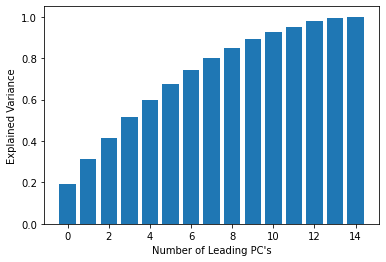

In [177]:
## plot explained variance barplot and comment on the appropriate number of eigenvectors based on that
n=15
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of Leading PC's")
plt.ylabel("Explained Variance")
plt.show()

In [178]:
## choose leading number of PCs as regressors and run linear regression again
np.random.seed(1)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:],Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(9) #take the 8 leading principal components to get enough data but avoid overfitting
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))

In [179]:
## report out of sample mean R2 score
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
R_IS.append(res.rsquared)
R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

IS R-squared is 0.881+-0.000
OS R-squared is 0.794+-0.000
Accuracy: 0.914 (0.027)


## 3: Modeling mean income with 311 complaint patterns

We'll use 311 complaints data set to model the mean income of zip codes in NYC. We will aslo check if using PCA in this case improves the performance as compared to just the linear model.

In [180]:
#load the income data
dataIncome=pd.read_csv("https://raw.githubusercontent.com/CUSP2021ADS/Data/main/MeanZIP.csv",index_col=0)
dataIncome=dataIncome.apply(pd.to_numeric, errors='coerce')
dataIncome=dataIncome.loc[dataIncome.Mean>0]
dataIncome.head()

,Median,Mean,Pop
Zip,,,
1001,56662.5735,66687.7509,16445
1002,49853.4177,75062.6343,28069
1003,28462.0000,35121.0000,8491
1005,75423.0000,82442.0000,4798
1007,79076.3540,85801.9750,12962


In [181]:
## 311 data
data311 = pd.read_csv('https://raw.githubusercontent.com/CUSP2021ADS/Data/main/aggr311.csv' , index_col=0 )
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070175,0.070175,0.000000,0.000000,0.000000,0.0,0.0
10001.0,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,0.005272,0.000146,0.000146,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,0.000177,0.000532,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,0.001154,0.000177,0.000177,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,0.000649,0.000000,0.000649,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0


In [182]:
#merge income data with 311
DataIncome1=dataIncome.merge(data311,left_index=True,right_index=True)

In [183]:
DataIncome1.head()

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10001.0,71244.6100,123112.7764,17678,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,30843.9574,46258.6118,70878,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,89998.5339,139330.9968,53609,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,110183.6857,156682.7615,1271,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0
10005.0,115133.2855,163762.6601,1517,0.000000,0.000000,0.008219,0.0,0.000000,0.002192,0.000548,...,0.000000,0.000000,0.000000,0.013699,0.000000,0.000548,0.000000,0.019726,0.0,0.0


### Task 1: Using 'Mean' as target variable, and 311 complaints as regressors, run a linear regression model and report out of sample (test) accuracy after cross validation

In [184]:
## code here
##Linear regression model 
data=DataIncome1.iloc[:,3:]
Y=DataIncome1.Mean
lm=sm.OLS(Y,sm.add_constant(data)).fit()
print(lm.summary())
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     23.81
Date:                Fri, 26 Feb 2021   Prob (F-statistic):           1.11e-07
Time:                        19:22:59   Log-Likelihood:                -1611.6
No. Observations:                 175   AIC:                             3547.
Df Residuals:                      13   BIC:                             4060.
Df Model:                         161                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Task 2: Now analyze performance using PCA depending on the number N of leading PCs to take.

In [185]:
# apply PCA first for whole data
np.random.seed(1)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:],Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(9) #take only 3 leading principal components to get enough data but avoid overfitting
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))

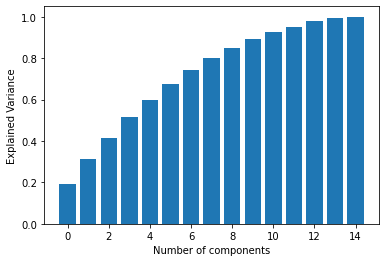

In [186]:
## plot explained variance and chose N leading PCs (choose N either by explained variance or try different values and choose best one)
n=15
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
#plt.step(np.sort(data), counts.cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [207]:
## train a linear model based on above N PCs and report out of sample accuracy (with cross-validation)

##Linear regression model 
data=DataIncome1.iloc[:,15:]
Y=DataIncome1.Mean
lm=sm.OLS(Y,sm.add_constant(data)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     17.39
Date:                Fri, 26 Feb 2021   Prob (F-statistic):           2.70e-11
Time:                        20:40:21   Log-Likelihood:                -1698.4
No. Observations:                 175   AIC:                             3699.
Df Residuals:                      24   BIC:                             4177.
Df Model:                         150                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [213]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.968 (0.010)


### Task 3: Try implementing Lasso regression (feature selection) over all the PCs.

Use alpha=10000 as the regularization parameter. Report out of sample mean R2 score by splitting data into train and test

In [203]:
from sklearn.linear_model import  Lasso

for Model in [Lasso]:
    model = Model()
    
    print('%s: %s' % (Model.__name__, cross_val_score(model, X, y).mean()))
from sklearn import linear_model
clf = linear_model.Lasso(alpha=10000)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])



## report mean out-of-sample R2 score
np.random.seed(1)

# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:],Y,test_size=0.4) 
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(3) 
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

Lasso: 0.41914168697088383
IS R-squared is 0.626+-0.040
OS R-squared is 0.510+-0.129


### Task 4: Implement cross-validation for Lasso PCA regression above with further splitting the training sample into training and validation and tuning the parameter over the validation sample

In [205]:
## code here
##cross-validation for Lasso PCA regression 

R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:],Y,test_size=0.35) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(8) 
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() 
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.707+-0.044
OS R-squared is 0.444+-0.210
